# 뉴럴 네트워크 다중 분류 (아이리스 데이터셋)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

## 1.데이터 준비

In [ ]:
!wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/iris.csv

--2025-01-02 07:42:28--  https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.77K  --.-KB/s    in 0s      

2025-01-02 07:42:28 (57.8 MB/s) - ‘iris.csv’ saved [3858/3858]



In [ ]:
df = pd.read_csv('iris.csv')
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.columns = [col.replace(' ','_') for col in df.columns]
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.isna().sum()

,0
Sepal_Length,0
Sepal_Width,0
Petal_Length,0
Petal_Width,0
Species,0


## 2. 데이터 분리

In [ ]:
x = df.drop(columns='Species')
y = df['Species']

x.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## 4. 모델 만들기

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# 학습
ss.fit(x_train)
# 데이터 변경
x_train_s = ss.transform(x_train)
x_test_s = ss.transform(x_test)

### 레이블 인코딩 (문자열이므로)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_e = le.fit_transform(y_train)
y_test_e = le.transform(y_test)

In [ ]:
y_test_e

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### 원핫 인코딩

In [ ]:
from keras.utils import to_categorical
y_train_o = to_categorical(y_train_e)
y_test_o = to_categorical(y_test_e)

y_train_o[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
type(x_train_s), type(y_train_o)

(numpy.ndarray, numpy.ndarray)

In [ ]:
x_train_s.shape

(120, 4)

## 4. 모델 만들기

In [ ]:
from keras import layers
import tensorflow as tf

model = keras.Sequential([
    keras.layers.Input(shape=(4,)),
    keras.layers.Dense(units = 16, activation='relu'),
    keras.layers.Dense(units = 8, activation='relu'),
    keras.layers.Dense(units = 3, activation='softmax') # 다중 분류 -> 클래스의 개수만큼 최종 출력 개수
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'] # 분류 -> accuracy
    )

In [ ]:
EPOCHS = 300
BATCHSIZE = 32

history = model.fit(x_train_s, y_train_o, epochs=EPOCHS, batch_size=BATCHSIZE, validation_split=0.2)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.4466 - loss: 1.1391 - val_accuracy: 0.5417 - val_loss: 1.0250
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4661 - loss: 1.0875 - val_accuracy: 0.5417 - val_loss: 1.0023
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4883 - loss: 1.0448 - val_accuracy: 0.5417 - val_loss: 0.9811
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4518 - loss: 1.0633 - val_accuracy: 0.6250 - val_loss: 0.9602
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5312 - loss: 1.0062 - val_accuracy: 0.6250 - val_loss: 0.9399
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5404 - loss: 0.9826 - val_accuracy: 0.6250 - val_loss: 0.9201
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5091 - loss: 0.9782 - val_accuracy: 0.6667 - val_loss: 0.9008
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5247 - loss: 0.9356 - val_accuracy: 0.6667 - val_loss

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train_accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val_accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

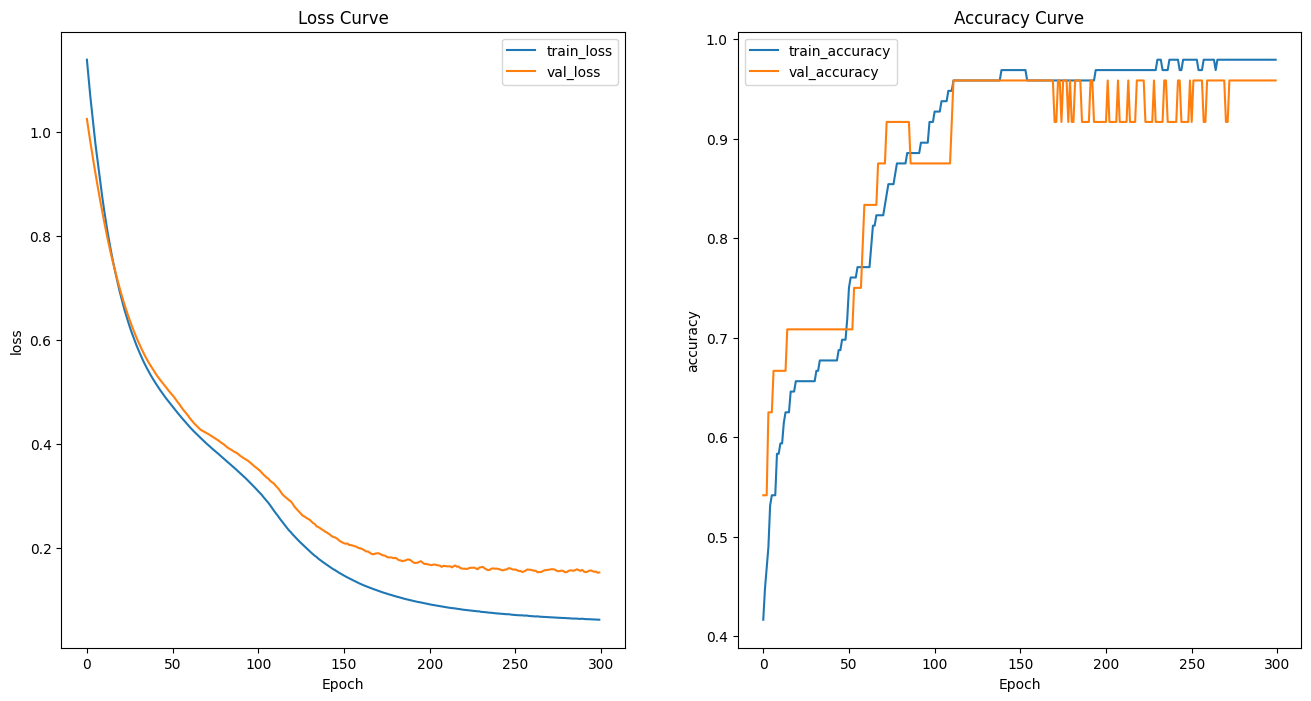

In [ ]:
plot_history(history)

## 5. 테스트
- x_test 스케일링
- y_test 레이블 인코딩
- y_test 원핫인코딩

In [ ]:
y_test_n = y_test.to_numpy()
type(x_test_s), type(y_test_o)

(numpy.ndarray, numpy.ndarray)

In [ ]:
y_pred = model.predict(x_test_s)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
y_pred[:5]

array([[2.90527102e-03, 9.80439305e-01, 1.66553911e-02],
       [9.95809972e-01, 4.17527137e-03, 1.47003602e-05],
       [1.22079583e-10, 2.92332643e-05, 9.99970734e-01],
       [1.43531919e-03, 8.87793481e-01, 1.10771246e-01],
       [4.85236698e-04, 9.83569145e-01, 1.59457382e-02]], dtype=float32)

In [ ]:
y_test_o[:5]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
y_pred = np.argmax(y_pred, axis=1) # 가장 큰 값을 가지는 인덱스

In [ ]:
y_test_e

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## 평가지표

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # import confusion_matrix
import seaborn as sns

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average='macro')
  recall = recall_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print(f'acc: {acc:.4f}, prec: {prec:.4f}, recall: {recall:.4f}, f1: {f1:.4f}')

  cm = confusion_matrix(y_true, y_pred) # Assign the result to a variable (e.g., cm)
  s = sns.heatmap(cm, cmap = 'Blues', annot=True, fmt = 'd',cbar=False) # Use the assigned variable
  s.set_xlabel('Predicted')
  s.set_ylabel('Actual')
  plt.show()

acc: 1.0000, prec: 1.0000, recall: 1.0000, f1: 1.0000


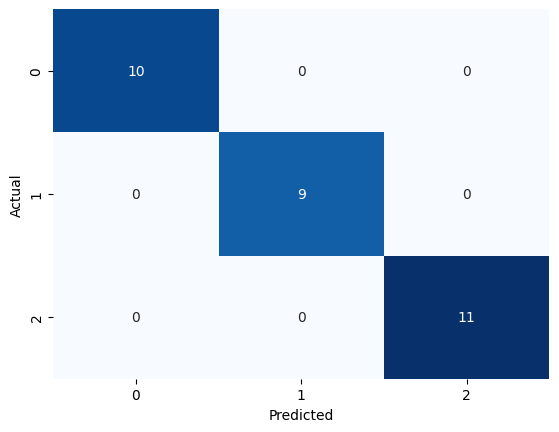

In [ ]:
print_metrics(y_test_e, y_pred)